In [1]:
import tushare as ts
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
import mplfinance as mpf
#画图时显示中文，使用微软雅黑字体，画图时显示负号
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False
# %matplotlib inline

# 股票选择

In [2]:
#定义了一些常用的股票代码，因为老是忘记代码，分别是中兴通讯，招商银行，茅台，可以自己再加
codes = {'zxtx':'000063','zsyh':'600036','mt':'600519'}
print("请输入(zxtx,zsyh或mt)：")
b=input()
code = codes[b]


请输入(zxtx,zsyh或mt)：
mt


In [3]:
#这个函数得到股票名，股票的存在日期集的列表，每日收盘价的列表
def get_line_pic(code):
    name = ts.get_realtime_quotes(code)['name'][0]  #股票名字
    t = ts.get_hist_data(code) #,'2017-01-09','2019-09-23') 可以多加两个参数---始末时间，获取时间段内的股票信息
    sz = t.sort_index(axis=0,ascending=True)  #按照时间排序
    price = []  #收盘价
    for i in sz['close']:  #i是float类型
        price.append(i)   #price是每天收盘价，列表，列表里的元素是float类型
    date = list(sz['close'].index)  #date是每一期的时间,是列表，列表里的元素是str类型
    xs = [datetime.strptime(d, '%Y-%m-%d').date() for d in date] #将date列表里str类型的数据转成date
    return name,xs,price

a = get_line_pic(code)

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


# 收盘价统计

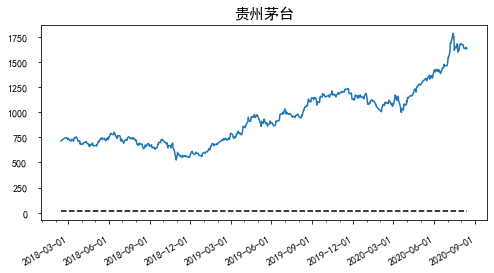

In [4]:
# figure布局
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
plt.title(a[0],fontsize=15)
ax1.plot(a[1], a[2])
plt.hlines(12,a[1][0],a[1][-1],linestyles = "dashed")  #加一条横虚线
plt.gcf().autofmt_xdate()  # 自动旋转日期标记
# 设置x轴主刻度格式
monthInterval = mdates.MonthLocator(interval=3)  # 主刻度为每三个月
ax1.xaxis.set_major_locator(monthInterval)  # 设置主刻度
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# 设置副刻度格式
month = mdates.MonthLocator()
ax1.xaxis.set_minor_locator(month)

# 参数pad用于设置刻度线与标签间的距离
ax1.tick_params(pad=10)
# 显示图像
plt.show()

从图中可以看出，贵州茅台股票收盘价从2018年开始便在快速上涨，预计2020年9月份时，其收盘价已为二年前的两倍

# 成交量与价格统计

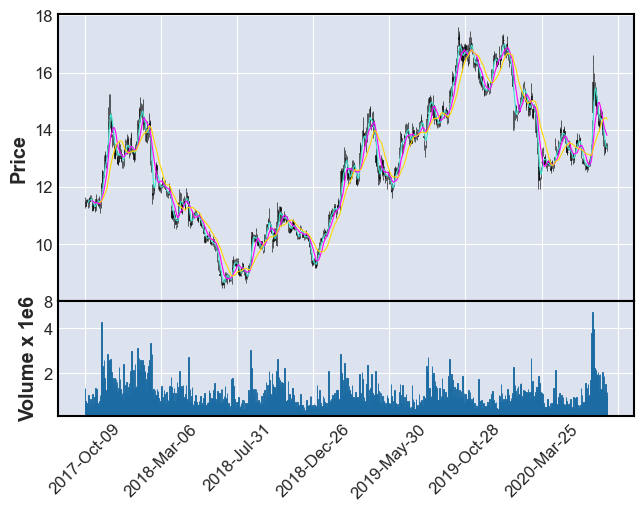

In [5]:
#pd.set_option()就是pycharm输出控制显示的设置
pd.set_option('expand_frame_repr', False)#True就是可以换行显示。设置成False的时候不允许换行
pd.set_option('display.max_columns', None)# 显示所有列
#pd.set_option('display.max_rows', None)# 显示所有行
pd.set_option('colheader_justify', 'centre')# 显示居中

pro = ts.pro_api('b9a80d289f475234064f77d2dc42639289bbc92b90a2a816d9c32629')
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
df = pro.daily(ts_code='000001.SZ', start_date='20171001', end_date='20200801')
#df.sort_values(by='trade_date',ascending=False)
data = df.loc[:, ['trade_date', 'open', 'close', 'high', 'low', 'vol']]  #：取所有行数据，后面取date列，open列等数据
data = data.rename(columns={'trade_date': 'Date', 'open': 'Open', 'close': 'Close', 'high': 'High', 'low': 'Low', 'vol': 'Volume'})  #更换列名，为后面函数变量做准备
data.set_index('Date', inplace=True)  #设置date列为索引，覆盖原来索引,这个时候索引还是 object 类型，就是字符串类型。
data.index = pd.DatetimeIndex(data.index)  #将object类型转化成 DateIndex 类型，pd.DatetimeIndex 是把某一列进行转换，同时把该列的数据设置为索引 index。
data = data.sort_index(ascending=True)  #将时间顺序升序，符合时间序列
mpf.plot(data, type='candle', mav=(5, 10, 20), volume=True, show_nontrading=False)